In [2]:
# Importando bibliotecas necessárias
import pandas as pd 
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt
import plotly.express as px   
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score 
from sklearn.preprocessing import StandardScaler
     


In [1]:






# Lendo o conjunto de dados
data = pd.read_csv('https://query.data.world/s/lzvnpcg2rif4soavu7s5oy4ai6drhi?dws=00000')

NameError: name 'pd' is not defined

In [3]:
# Exibindo as primeiras linhas do conjunto de dados
data.head(10) 

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Montrose Beach,08/30/2013 08:00:00 AM,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,MontroseBeach201308300800
1,Ohio Street Beach,05/26/2016 01:00:00 PM,14.4,1.23,NaN,0.111,4.0,12.4,05/26/2016 1:00 PM,OhioStreetBeach201605261300
2,Calumet Beach,09/03/2013 04:00:00 PM,23.2,3.63,1.201,0.174,6.0,9.4,9/3/2013 4:00 PM,CalumetBeach201309031600
3,Calumet Beach,05/28/2014 12:00:00 PM,16.2,1.26,1.514,0.147,4.0,11.7,5/28/2014 12:00 PM,CalumetBeach201405281200
4,Montrose Beach,05/28/2014 12:00:00 PM,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,MontroseBeach201405281200
5,Montrose Beach,05/28/2014 01:00:00 PM,14.5,2.72,1.395,0.306,3.0,11.9,5/28/2014 1:00 PM,MontroseBeach201405281300
6,Calumet Beach,05/28/2014 01:00:00 PM,16.3,1.28,1.524,0.162,4.0,11.7,5/28/2014 1:00 PM,CalumetBeach201405281300
7,Montrose Beach,05/28/2014 02:00:00 PM,14.8,2.97,1.386,0.328,3.0,11.9,5/28/2014 2:00 PM,MontroseBeach201405281400
8,Calumet Beach,05/28/2014 02:00:00 PM,16.5,1.32,1.537,0.185,4.0,11.7,5/28/2014 2:00 PM,CalumetBeach201405281400
9,Calumet Beach,05/28/2014 03:00:00 PM,16.8,1.31,1.568,0.196,4.0,11.7,5/28/2014 3:00 PM,CalumetBeach201405281500


In [4]:
#Eliminando colunas desnecessarias 
data = data.drop(columns=['Measurement ID','Measurement Timestamp','Measurement Timestamp Label'])
    

In [18]:
# Exibindo estatísticas descritivas do conjunto de dados
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Beach Name,34923.0,2.927813,1.582280,1.000,2.000,3.000,4.00,6.000
Water Temperature,34923.0,19.360061,3.366200,0.000,17.100,19.600,22.00,31.500
Turbidity,34923.0,4.822746,33.503781,0.000,0.660,1.260,2.54,1683.480
Transducer Depth,34923.0,0.451156,0.716732,-0.082,0.000,0.000,1.37,2.214
Wave Height,34923.0,-1506.000911,12180.035183,-99999.992,0.109,0.154,0.20,1.467
Wave Period,34923.0,-1502.391032,12180.482684,-100000.000,3.000,3.000,4.00,10.000
Battery Life,34923.0,11.036308,0.785147,0.000,10.600,11.000,11.50,13.300


In [6]:
# Visualizando as praias do dataset
data['Beach Name'].unique()

array(['Montrose Beach', 'Ohio Street Beach', 'Calumet Beach',
       '63rd Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

In [19]:
#Transformando dados qualitatitivos em numericos  

# 1 - Montrose Beach 
# 2 - Ohio Street Beach 
# 3 - Calumet Beach 
# 4 - 63rd Street Beach 
# 5 - Osterman Beach 
# 6 - Rainbow Beach

beach_dict = {'Montrose Beach': 1, 'Ohio Street Beach': 2, 'Calumet Beach': 3, '63rd Street Beach': 4, 'Osterman Beach': 5, 'Rainbow Beach': 6}
data = data.replace(beach_dict) 

In [8]:
# Visualizando numero de linhas e coluanas
data.shape

(34923, 7)

In [20]:
# Substituindo valores ausentes por zero
data = data.fillna(0)

In [10]:
# Selecionando colunas para correlação
corr_data = data.iloc[0:100,1:5:]   
corr_data

,Water Temperature,Turbidity,Transducer Depth,Wave Height
0,20.3,1.18,0.891,0.080
1,14.4,1.23,0.000,0.111
2,23.2,3.63,1.201,0.174
3,16.2,1.26,1.514,0.147
4,14.4,3.36,1.388,0.298
...,...,...,...,...
95,16.8,1.45,1.492,0.107
96,15.5,5.28,1.443,0.202
97,15.8,5.04,1.454,0.193
98,17.2,1.46,1.496,0.116


<AxesSubplot:>

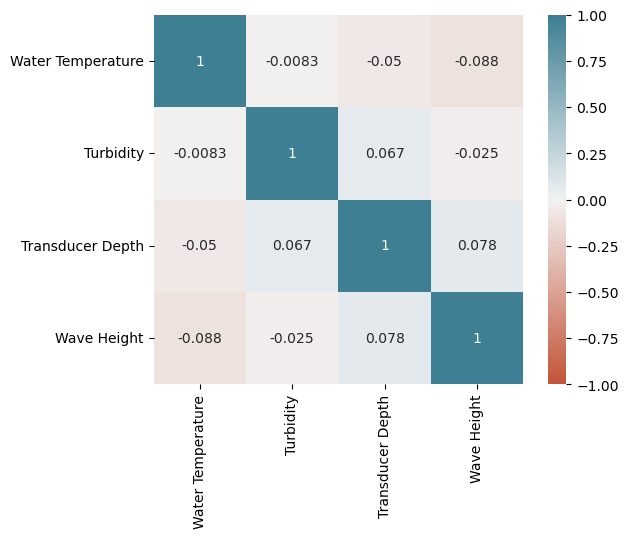

In [11]:
# Visualizando a matriz de correlação entre as variáveis
corr_data = data.iloc[:, 1:5]
corr = corr_data.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)


In [21]:
# Aplicando k-means para clustering com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=34923)
clustering = kmeans.fit_predict(data) 
clustered= np.reshape(clustering, (len(data),)) 

In [22]:
# Aplicando o algoritmo de clustering aglomerativo com 5 clusters
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
clustering = clustering.fit_predict(data)  

In [23]:
# Selecionando um subconjunto do conjunto de dados original para visualização do dendrograma
selected_data = data.iloc[0:100, 1::3]

In [15]:
silhouette = silhouette_score(data, clustering)
print("Silhouette:", silhouette)

Silhouette: 0.9863962670340232


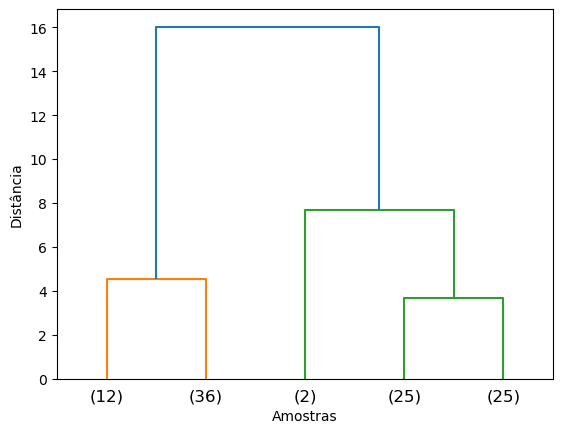

In [16]:
# Função para criar o dendrograma
def create_dendrogram(data, num_clusters):
    # Normalizando os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Criando os clusters usando o método de Ward e a métrica euclidiana
    clusters = shc.linkage(scaled_data, method='ward', metric='euclidean')
    
    # Criando o dendrograma
    shc.dendrogram(clusters, truncate_mode='lastp', p=num_clusters)
    
    # Definindo os rótulos dos eixos Y e X
    plt.ylabel('Distância')
    plt.xlabel('Amostras')
    
    # Exibindo o dendrograma
    plt.show()

# Criando o dendrograma com 5 clusters
create_dendrogram(selected_data, num_clusters=5)
